# Logistic Regression

In [6]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
%store -r final_df
final_df

,Temp,Humidity,Wind,Rain,FFMC,DMC,DC,ISI,Actual Fire
0,8.2,51.0,6.7,0.0,86.2,26.2,94.3,5.1,0.0
1,18.0,33.0,0.9,0.0,90.6,35.4,669.1,6.7,0.0
2,14.6,33.0,1.3,0.0,90.6,43.7,686.9,6.7,0.0
3,8.3,97.0,4.0,0.2,91.7,33.3,77.5,9.0,0.0
4,11.4,99.0,1.8,0.0,89.3,51.3,102.2,9.6,0.0
...,...,...,...,...,...,...,...,...,...
756,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,1.0
757,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,0.0
758,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,0.0
759,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,0.0


Independence of cases - Each case should be independent of other cases
Non-Linearity - Outcome and predictors have no linear relationship but logit of outcome and any continuous predictors has a linear relationship
No multi-colinearity - No predictor should be a linear function of other predictors, and predictors should not be too closely related to each other. Estimation is impossible for perfect multi-colinearity, whereas, strong multi-colinearity cause imprecise estimation.
No complete separation - The value of one variable cannot be perfectly predicted by one variable or a set of variables. This usually happens when there are empty cells (or values are zero) on category variables in the model.

1.5.1 Likelihood ratio test
1.5.2 Wald Test

In [21]:
final_df['Actual Fire'].value_counts()

1.0    407
0.0    353
Name: Actual Fire, dtype: int64

In [7]:
final_df_remove_outliers = final_df[(np.abs(zscore(final_df)) < 3).all(axis=1)]

final_df.index.difference(final_df_remove_outliers.index)

Int64Index([ 11,  22, 266, 299, 312, 374, 379, 406, 408, 440, 444, 499, 519,
            520, 525, 529, 531, 532, 533, 608, 609, 610, 611, 621, 622, 623,
            633, 637, 638, 640, 641, 652, 654, 655, 656, 657, 676, 731, 735,
            736, 757, 758],
           dtype='int64')

In [31]:
feature_cols = ['Temp', 'Humidity', 'Wind', 'Rain']
X = final_df_remove_outliers[feature_cols]
Y = final_df_remove_outliers['Actual Fire']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [32]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,Y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [33]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[32, 40],
       [30, 78]], dtype=int64)

In [34]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6111111111111112


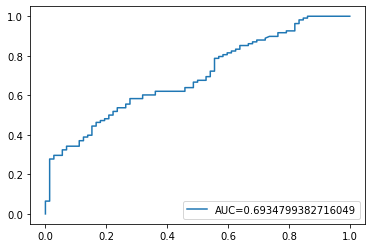

In [35]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()